In [3]:
from utils.visual import *
import torch
import matplotlib.pyplot as plt
import os

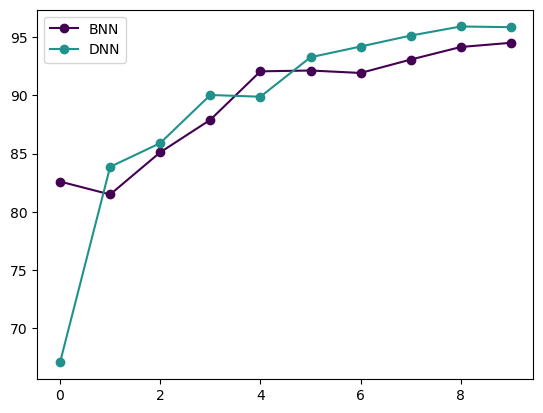

In [65]:
data = [
    "./saved_deep_models/2024-06-18-17h46:19-BHUparallel-BS128-512-PermutedMNIST-signelephant-v1/params-network-0/accuracy.pt",
    "./saved_deep_models/2024-06-18-15h37:48-BHUparallel-BS128-512-512-PermutedMNIST-signelephant-v1/params-network-0/accuracy.pt"
]

means = []
stds = []
for d in data:
    accuracy = [torch.load(d)]
    mean, std = get_mean_std_accuracies(accuracy, t_start=1, t_end=10)
    means.append(mean)
    stds.append(std)
fig, ax = plt.subplots()


palette = plt.get_cmap('viridis', len(means)+1)
for i, (mean, std) in enumerate(zip(means, stds)):
    ax.plot(mean, zorder=3, marker='o', color=palette(i), label="BNN" if i == 0 else "DNN")
    ax.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.3)
    
plt.legend()
plt.show()

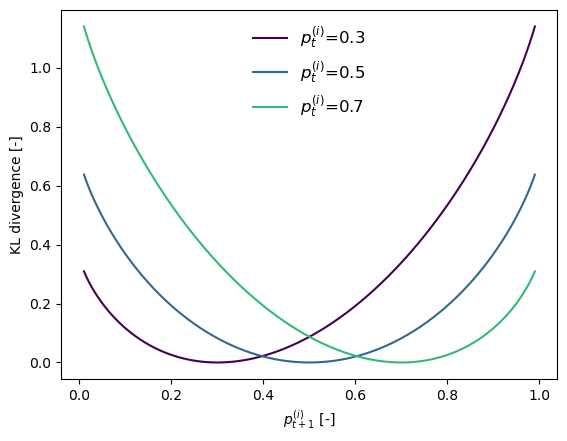

<Figure size 640x480 with 0 Axes>

In [ ]:
p2 = torch.tensor([0.3, 0.5, 0.7])
p1 = torch.linspace(0.01, 0.99, 1000)

# KL divergence
kl = lambda x: torch.log(1-p1) - torch.log(1-x) + p1 * torch.log(p1*(1-x)/(x*(1-p1)))
cm = plt.get_cmap('viridis', len(p2)+1)
# plot 
for i, p in enumerate(p2):
    plt.plot(p1, kl(p).detach().numpy(), label=r'$p_{t}^{(i)}$'+ f'={p:.1f}', color=cm(i))
plt.xlabel('$p_{t+1}^{(i)}$ [-]')
plt.ylabel('KL divergence [-]')
plt.legend(frameon=False, fontsize=12)
plt.show()
# save as pdf and svg
os.makedirs('paper', exist_ok=True)
plt.savefig('paper/kl_divergence.pdf', bbox_inches='tight')
plt.savefig('paper/kl_divergence.svg')

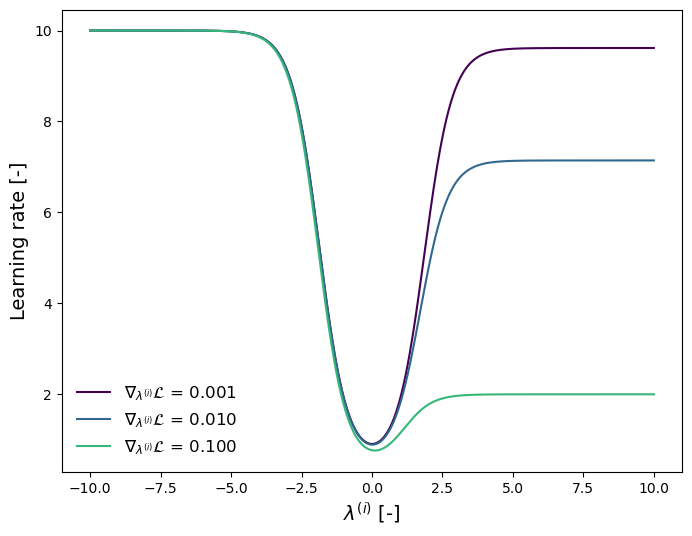

<Figure size 640x480 with 0 Axes>

In [ ]:
 # plot 1/cosh²(x)
x = torch.linspace(-10, 10, 1_000)
grads = torch.tensor([0.001, 0.01, 0.1])
alpha = 10
# color map viridis
cm = plt.get_cmap('viridis', len(grads)+1)
plt.figure(figsize=(8, 6))
for index, grad in enumerate(grads):
    f = 1/(1/torch.cosh(x)**2 + grad*2*torch.tanh(x) + 2*torch.abs(grad) + 1/alpha)
    plt.plot(x, f, label=r'$\nabla_{\lambda^{(i)}}\mathcal{L}$'+ f' = {grad:.3f}', color=cm(index))
plt.ylabel(r'Learning rate [-]', fontsize=14)
plt.legend(fontsize=12, frameon=False, loc='lower left')
plt.xlabel('$\lambda^{(i)}}$ [-]', fontsize=14)

# save as pdf and svg
plt.savefig('paper/learning_rate.pdf', bbox_inches='tight')
plt.savefig('paper/learning_rate.svg')
plt.show()

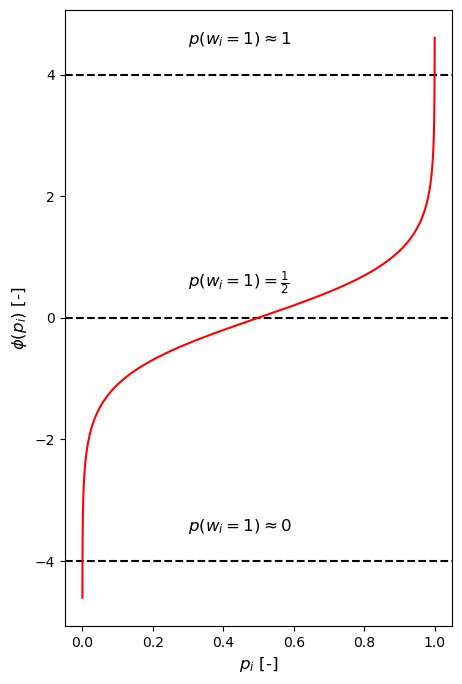

In [ ]:
p = torch.arange(0, 1, 0.0001)
fct = 1/2 *torch.log(p/(1-p))
# add grid
fig, ax = plt.subplots(figsize=(5, 8))
# dashed line at y=0
ax.axhline(y=0, color='black', linestyle='--')
ax.axhline(y=4, color='black', linestyle='--')
ax.axhline(y=-4, color='black', linestyle='--')
# write a text above each dashed line corresponding to p=0, p=1/2, p=1
ax.text(0.3, 0.5, r'$p(w_i = 1) = \frac{1}{2}$', fontsize=12)
ax.text(0.3, 4.5, r'$p(w_i = 1) \approx 1$', fontsize=12)
ax.text(0.3, -3.5, r'$p(w_i = 1) \approx 0$', fontsize=12)

ax.set_xlabel(r'$p_i$ [-]', fontsize=12)
ax.set_ylabel(r'$\phi(p_i)$ [-]', fontsize=12)
ax.plot(p, fct, color='red')
 

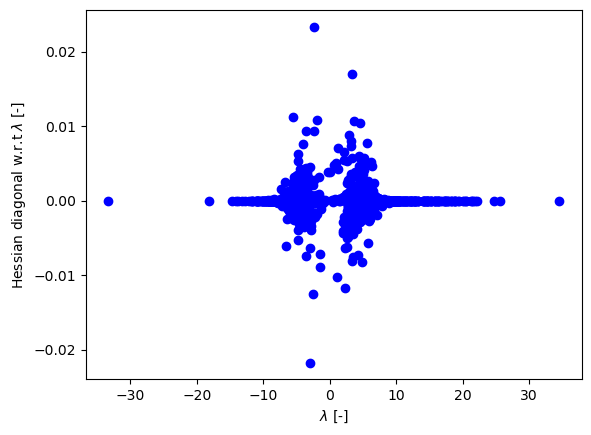

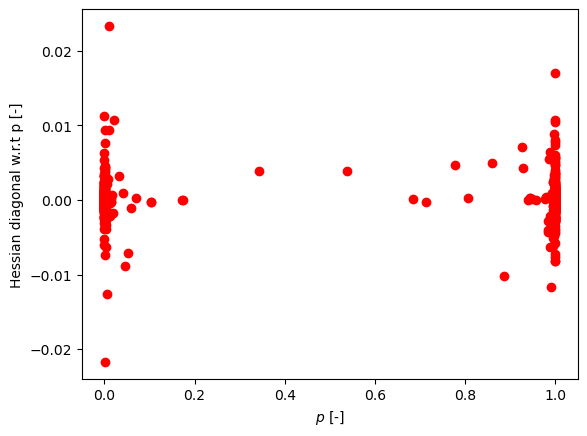

In [ ]:
hessian = torch.load("hessian/hessian.pt")[-1].reshape(-1).detach().cpu()
lambda_ = torch.load("hessian/lambda.pt").reshape(-1).detach().cpu()
grad = torch.load("hessian/gradient.pt")[-1].reshape(-1).detach().cpu()

plt.figure()
# Plot y = hessian and x = lambda
plt.scatter(lambda_, hessian, c='b', marker='o')
plt.xlabel('$\lambda$ [-]')
plt.ylabel(r'Hessian diagonal w.r.t $\lambda$ [-]')
plt.show()

p = torch.sigmoid(2*lambda_)
dlbddp = 1/(2*p - (2*p)**2 + 1e-5)
dlbddp2 = (2*p-1) / (2*(p-1)**2 * p**2+ 1e-5)
dLdp2 = hessian * dlbddp**2 + dlbddp2*grad
plt.scatter(p, hessian, c='r', marker='o')
plt.xlabel('$p$ [-]')
plt.ylabel(r'Hessian diagonal w.r.t p [-]')
plt.show()